# An Analysis on the Likeliness of People Changing Their Occupation

Author: Nikolina Sentovich

Course Project, UC Irvine, Math 10, F24

I would like to post my notebook on the course's website. [Yes]


## Introduction

In this project, I will analyze what causes people to change jobs. As a college student who is not 100% set on what I want to do, I am curious to find out what factors have the biggest impact on prompting a career switch. Are there certain fields of study that are more likely to ? What about certain occupations? Are there other important factors?  
  
The goal of this project is to perform data cleaning and explore the data set by creating different models in order to get a better understanding of industry, the job market, and likelihood of changing occupation. I found a dataset on Kaggle which, according to the creator, has 30,000+ records and 22 features.   
  
[Kaggle Dataset: Field Of Study vs Occupation](https://www.kaggle.com/datasets/jahnavipaliwal/field-of-study-vs-occupation)

## Libraries and Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from pandas.plotting import scatter_matrix

## Dataset

In [2]:
df = pd.read_csv('career_change_prediction_dataset.csv').copy()

In [3]:
df.head()

,Field of Study,Current Occupation,Age,Gender,Years of Experience,Education Level,Industry Growth Rate,Job Satisfaction,Work-Life Balance,Job Opportunities,...,Skills Gap,Family Influence,Mentorship Available,Certifications,Freelancing Experience,Geographic Mobility,Professional Networks,Career Change Events,Technology Adoption,Likely to Change Occupation
0,Medicine,Business Analyst,48,Male,7,High School,High,7,10,83,...,8,High,0,0,0,1,2,0,1,0
1,Education,Economist,44,Male,26,Master's,Low,10,3,55,...,3,Medium,0,0,1,1,2,1,9,0
2,Education,Biologist,21,Female,27,Master's,Low,8,3,78,...,4,Low,0,0,0,0,2,1,2,0
3,Education,Business Analyst,33,Male,14,PhD,Medium,7,9,62,...,2,Medium,1,0,0,0,9,0,1,0
4,Arts,Doctor,28,Female,0,PhD,Low,3,1,8,...,5,Low,0,0,1,0,2,0,7,1


## Features

The following features and their descriptions are provided from [the Kaggle Dataset](https://www.kaggle.com/datasets/jahnavipaliwal/field-of-study-vs-occupation). 


__Field of Study:__  

Type: Categorical (String)  
Description: The area of academic focus during the individual’s education.  


__Current Occupation:__   

Type: Categorical (String)  
Description: The individual's current job or industry they are employed in.  


__Age:__  

Type: Integer  
Description: The age of the individual.  


__Gender:__  

Type: Categorical (String)  
Description: The gender of the individual.  


__Years of Experience:__  

Type: Integer  
Description: The number of years the individual has been in the workforce.  


__Education Level:__   

Type: Categorical (String)  
Description: The highest level of education completed by the individual.  


__Industry Growth Rate:__  

Type: Categorical (String)  
Description: The growth rate of the industry the individual works in.  


__Job Satisfaction:__  

Type: Integer (1-10 scale)  
Description: A rating of the individual’s job satisfaction.  


__Work-Life Balance:__  

Type: Integer (1-10 scale)  
Description: A rating of the individual's perceived work-life balance.  


__Job Opportunities:__  

Type: Integer  
Description: The number of available job opportunities in the individual’s field.  


__Salary:__  

Type: Integer  
Description: The annual salary of the individual (in USD or local currency equivalent).  


__Job Security:__  

Type: Integer (1-10 scale)  
Description: A rating of the individual’s perceived job security.  


__Career Change Interest:__  

Type: Integer (0 or 1)  
Description: Whether the individual is interested in changing their occupation (1 for yes, 0 for no).  


__Skills Gap:__  

Type: Integer (1-10 scale)  
Description: A measure of how well the individual’s current skills match their job requirements.  


__Family Influence:__  

Type: Categorical (String)  
Description: The degree of influence the individual’s family has on their career choice.  


__Mentorship Available:__  

Type: Integer (0 or 1)  
Description: Whether the individual has access to a mentor in their current job.  


__Certifications:__  

Type: Integer (0 or 1)  
Description: Whether the individual holds any certifications relevant to their occupation.  


__Freelancing Experience:__  

Type: Integer (0 or 1)  
Description: Whether the individual has freelanced in the past.  


__Geographic Mobility:__  

Type: Integer (0 or 1)  
Description: Whether the individual is willing to relocate for a job.  


__Professional Networks:__  

Type: Integer (1-10 scale)  
Description: A measure of how strong the individual's professional network is.  


__Career Change Events:__  

Type: Integer  
Description: The number of career changes the individual has made in the past.  


__Technology Adoption:__  

Type: Integer (1-10 scale)  
Description: A measure of the individual’s comfort level with adopting new technologies.  


__Target Variable: Likely to Change Occupation:__  

Type: Integer (0 or 1)  
Description: The target variable indicating whether an individual is likely to change their occupation.  


## Data Cleaning

I am first going to convert all my catagorical data into numerical data. This way, it will be easier to clean the data and reduce the dimension. I did some research and found that the One Hot Encoder Method would be good to use on my data set. Code is inspired by [Geeks for Geeks: One Hot Encoding using Scikit Learn Library](https://www.geeksforgeeks.org/ml-one-hot-encoding/)

In [4]:
# Selecting the categorical features
categorical_features = ['Field of Study', 'Current Occupation', 'Gender', 
                        'Education Level', 'Industry Growth Rate', 'Family Influence']

# Initialize the encoder
encoder = OneHotEncoder(sparse_output=False)

# Applying one-hot encoding to the categorical features
one_hot_encoded = encoder.fit_transform(df[categorical_features])

# Create a df with the one-hot encoded/dummy features
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_features), index=df.index)

# Concatenate the one-hot encoded df with the original df
df_encoded = pd.concat([df, one_hot_df], axis=1)

# drop the original categorical columns (since they are now encoded)
df_encoded = df_encoded.drop(columns=categorical_features)


display(df_encoded.head())

,Age,Years of Experience,Job Satisfaction,Work-Life Balance,Job Opportunities,Salary,Job Security,Career Change Interest,Skills Gap,Mentorship Available,...,Education Level_High School,Education Level_Master's,Education Level_PhD,Industry Growth Rate_High,Industry Growth Rate_Low,Industry Growth Rate_Medium,Family Influence_High,Family Influence_Low,Family Influence_Medium,Family Influence_nan
0,48,7,7,10,83,198266,8,0,8,0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,44,26,10,3,55,96803,9,0,3,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,21,27,8,3,78,65920,4,0,4,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,33,14,7,9,62,85591,5,0,2,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,28,0,3,1,8,43986,3,0,5,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


We proceed with data cleaning by checking for columns with missing values. The results show that there are no columns with missing values. 

In [5]:
missing_values = df_encoded.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


Now that my dataframe only consists of numerical data, I am going to do a Lasso Regression to see which features have the greatest significance on the targert variable (likley to change occupation)     
The following code is inspired by the [Math 10 Lecture Notes on Lasso Regression.](https://rayzhangzirui.github.io/math10fa24/notes/regularization.html#the-lasso). I modified the plot to be bars instead for easier viewing. 

Mean Squared Error: 0.1054


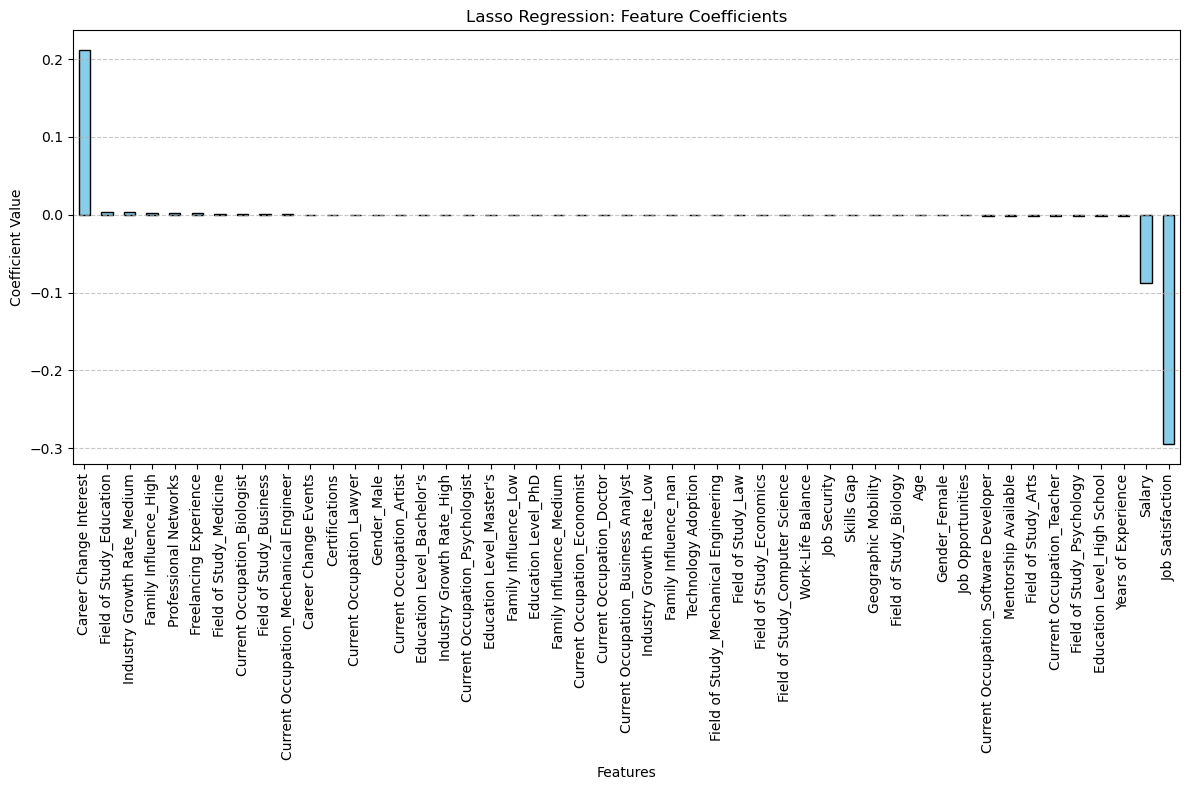

In [6]:
# Define the target variable and features
target = 'Likely to Change Occupation'  
X = df_encoded.drop(columns=[target])
y = df_encoded[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Lasso regression
lasso = Lasso(alpha=0.001, random_state=42)  
lasso.fit(X_train_scaled, y_train)

# predictions
y_pred = lasso.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# Get coefficients
coefficients = pd.Series(lasso.coef_, index=X.columns)

plt.figure(figsize=(12, 8))
coefficients.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Lasso Regression: Feature Coefficients")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=90)  # Rotate feature names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


Based on the results of the Lasso Regression, we can infer from this plot that the three main features that have the greatest impact on the target variable are Career Change Interest, Salary, and Job Satisfaction.  
Career change interest has a __positive__ relationship with the likeliness to change occupation. That is, as career change interest increases, likeliness to change occupation increases. However, salary and job satisfaction has a __negative__ relationship with the likliness to change occupation, meaning that as salary and job satisfaction increase (decrease), the likeliness to change occupation decreases (increases).

So, now we know the features that have the most significant impact on the target variable, but what about the about the other features? I want to keep the top features that have an impact on the target variable to keep this project more interesting.   
   
In the following code, I do another plot of coefficents from the Lasso Regression, but I drop Career Change Interest, Salary, and Job Satisfaction so I can zoom in and determine what the next most significant features are. 


Filtered Coefficients (Sorted by Absolute Value):
 Field of Study_Education                  3.295490e-03
Industry Growth Rate_Medium               3.239855e-03
Family Influence_High                     2.469651e-03
Professional Networks                     2.251828e-03
Years of Experience                      -2.205886e-03
Education Level_High School              -1.962927e-03
Freelancing Experience                    1.766056e-03
Field of Study_Psychology                -1.623722e-03
Current Occupation_Teacher               -1.544169e-03
Field of Study_Arts                      -1.290953e-03
Mentorship Available                     -1.142822e-03
Current Occupation_Software Developer    -1.049295e-03
Job Opportunities                        -8.464807e-04
Gender_Female                            -8.162868e-04
Age                                      -6.384907e-04
Field of Study_Medicine                   5.987319e-04
Field of Study_Biology                   -4.552262e-04
Current Occupa

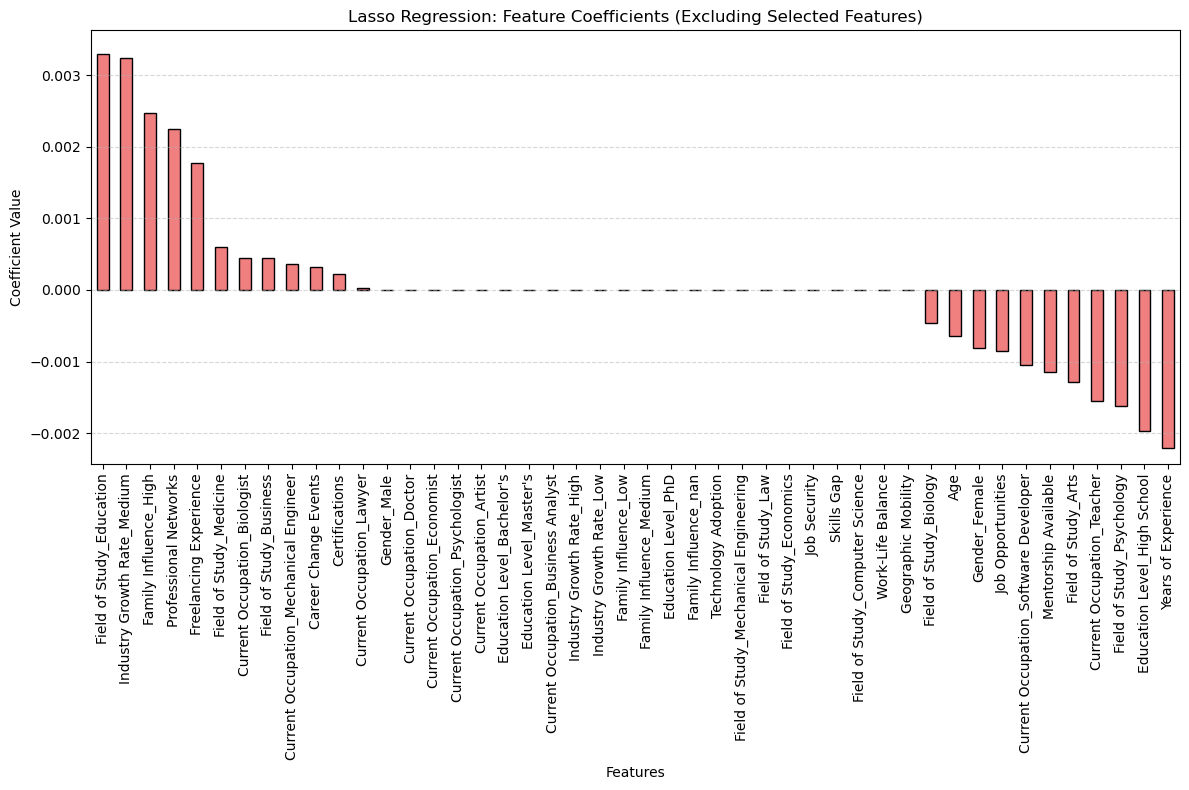

In [7]:
# Define features to drop
excluded_features = ['Career Change Interest', 'Salary', 'Job Satisfaction']

# Filter the coefficients
filtered_coefficients = coefficients.drop(index=excluded_features)


# Sort filtered coefficients by absolute value
sorted_filtered_coefficients = filtered_coefficients.reindex(
    filtered_coefficients.abs().sort_values(ascending=False).index
)
print("Filtered Coefficients (Sorted by Absolute Value):\n", sorted_filtered_coefficients)


# y-axis limits
y_min, y_max = filtered_coefficients.min() * 1.1, filtered_coefficients.max() * 1.1  # Add margin

# Plot the filtered coefficients
plt.figure(figsize=(12, 8))
filtered_coefficients.sort_values(ascending=False).plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title("Lasso Regression: Feature Coefficients (Excluding Selected Features)")
plt.ylim(y_min, y_max)  
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=90)  # Rotate feature names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5)  
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


Based on the results of this Lasso Regression, I will drop all of the features that the Lasso Regression drives the coefficent to zero since that means they don't hold a lot of signficance to the target variable. I will create a new dataframe (features_reduced_dataframe) to work with. 

In [8]:
# Name zero coefficient features
zero_coefficient_features = filtered_coefficients[filtered_coefficients == 0].index.tolist()

# Droping zero coefficient features from the dataset
features_reduced_df = X.drop(columns=zero_coefficient_features)


#Adding back the target variable
features_reduced_df['Likely to Change Occupation'] = df_encoded['Likely to Change Occupation']


display(features_reduced_df)


,Age,Years of Experience,Job Satisfaction,Job Opportunities,Salary,Career Change Interest,Mentorship Available,Certifications,Freelancing Experience,Geographic Mobility,...,Current Occupation_Lawyer,Current Occupation_Mechanical Engineer,Current Occupation_Software Developer,Current Occupation_Teacher,Gender_Female,Gender_Male,Education Level_High School,Industry Growth Rate_Medium,Family Influence_High,Likely to Change Occupation
0,48,7,7,83,198266,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0
1,44,26,10,55,96803,0,0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,21,27,8,78,65920,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
3,33,14,7,62,85591,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
4,28,0,3,8,43986,0,0,0,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38439,24,34,8,92,117728,1,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
38440,21,24,2,73,132500,1,1,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
38441,35,21,4,77,55301,0,1,1,1,0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
38442,35,11,9,63,171459,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0


Here are some basic general statistics of some of features of the reduced features dataframe that we will be using for the remainder of the project.  
  
Please note that for Career Change Interest, 1 means YES and 0 means NO. So based off the statistics, the average leans toward NO

In [9]:
stat_columns = ['Age', 'Salary', 'Job Opportunities', 'Job Satisfaction', 'Years of Experience','Career Change Interest']
summary_stats = features_reduced_df[stat_columns].describe(include='all')

print(summary_stats)

                Age         Salary  Job Opportunities  Job Satisfaction  \
count  38444.000000   38444.000000       38444.000000      38444.000000   
mean      39.540422  114975.623999          50.308267          5.489673   
std       11.574509   48963.725598          28.877294          2.870407   
min       20.000000   30005.000000           1.000000          1.000000   
25%       30.000000   72701.500000          25.000000          3.000000   
50%       40.000000  114861.000000          50.000000          6.000000   
75%       50.000000  157241.000000          75.000000          8.000000   
max       59.000000  199996.000000         100.000000         10.000000   

       Years of Experience  Career Change Interest  
count         38444.000000            38444.000000  
mean             19.548200                0.199901  
std              11.552474                0.399931  
min               0.000000                0.000000  
25%              10.000000                0.000000  
50%   

To further clarify the distribution of career change interest, here is a histogram, indicating that more people selected that they have an interest in changing their career. 

# Field of Study/Occupation

Even though generally Field of Study and Occupation types do not have as big of a significance on the target variable as other features, I still want to see which of the Fields of Study and Occupations cause people to be more likely to change careers. 

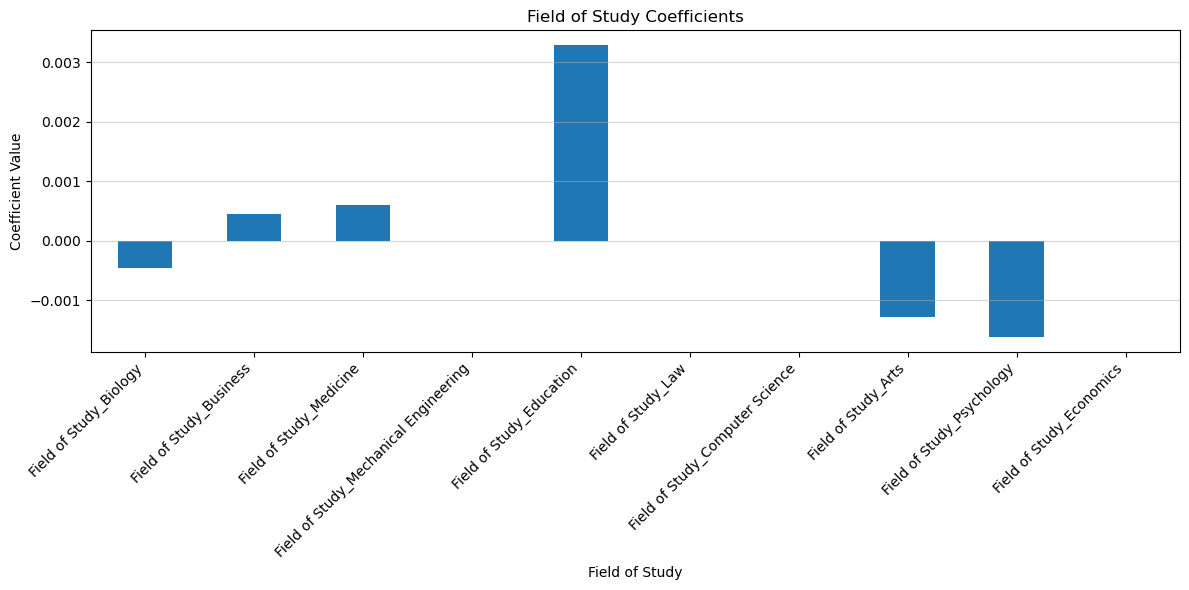

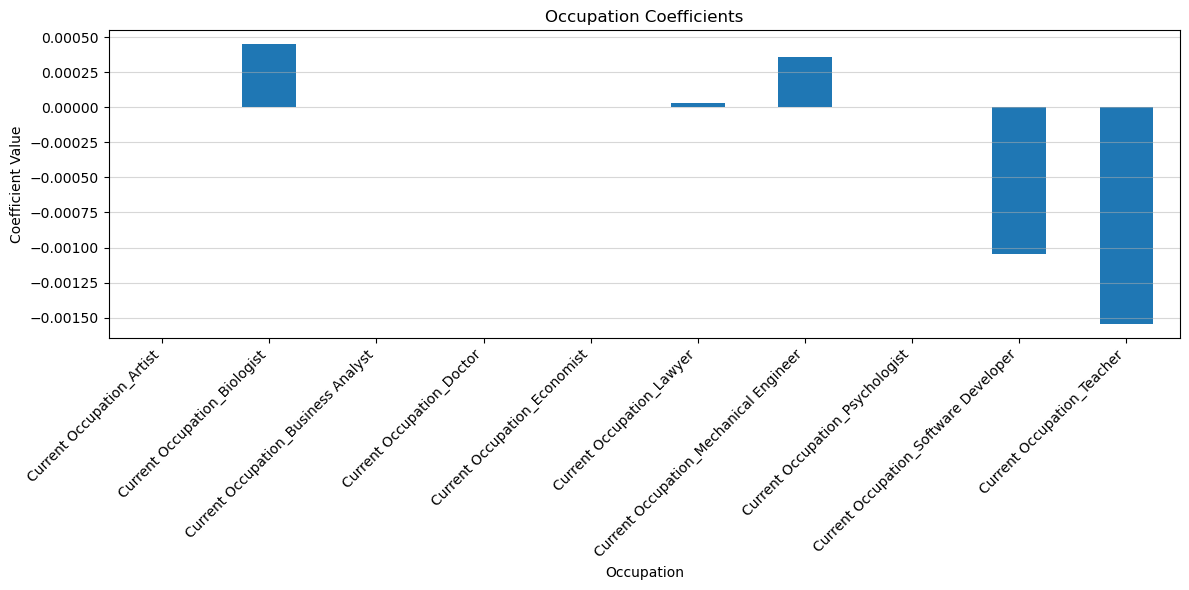

In [10]:
import matplotlib.pyplot as plt

# Selecting columns
field_of_study_df = filtered_coefficients[['Field of Study_Biology', 'Field of Study_Business', 'Field of Study_Medicine', 'Field of Study_Mechanical Engineering', 'Field of Study_Education', 'Field of Study_Law', 'Field of Study_Computer Science', 'Field of Study_Arts', 'Field of Study_Psychology', 'Field of Study_Economics']]

occupation_df = filtered_coefficients[['Current Occupation_Artist', 'Current Occupation_Biologist', 'Current Occupation_Business Analyst', 'Current Occupation_Doctor', 'Current Occupation_Economist', 'Current Occupation_Lawyer', 'Current Occupation_Mechanical Engineer', 'Current Occupation_Psychologist', 'Current Occupation_Software Developer', 'Current Occupation_Teacher']]

plt.figure(figsize=(12, 6))
field_of_study_df.T.plot(kind="bar")
plt.title("Field of Study Coefficients")
plt.xlabel("Field of Study")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis = 'y',alpha = 0.5)
plt.show()

plt.figure(figsize=(12, 6))
occupation_df.T.plot(kind="bar")
plt.title("Occupation Coefficients")
plt.xlabel("Occupation")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis = 'y', alpha = 0.5)
plt.show()


By these results, we can conclude that those who study Education are more likely to change occupations, while those who study psychology are the least likely.   
Also, Biologists are the most likely to change occupations, while teachers are the least likely to change occupations. 

## Examining Relationships Between the Three Most Important Features 

Based on the results of the Lasso Regression, we know that the three features that have the greatest influence on the target variable: likelihood of a career change. The features are: Salary, Career Change Interest, and Job Satisfaction. 

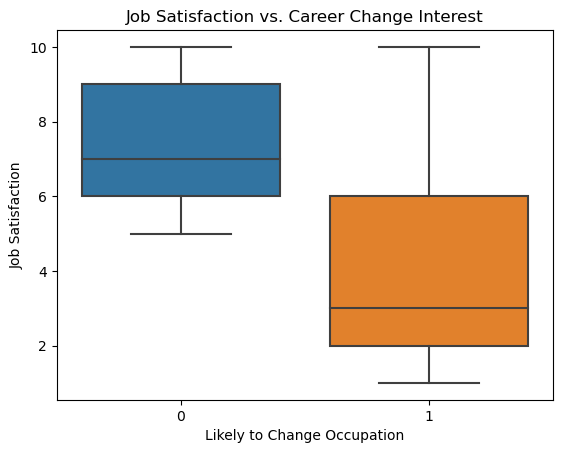

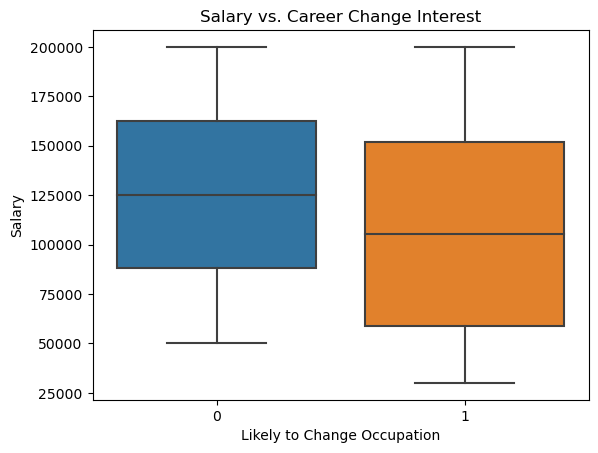

In [11]:
#Making Box Plots
plt.figure()
sns.boxplot(x='Likely to Change Occupation', y='Job Satisfaction', data=features_reduced_df)
plt.title('Job Satisfaction vs. Career Change Interest')
plt.show()

plt.figure()
sns.boxplot(x='Likely to Change Occupation', y='Salary', data=features_reduced_df)
plt.title('Salary vs. Career Change Interest')
plt.show()

The results suggest that the median salary is higher for those not likely to change jobs.
Additionallly, the median Job Satisfaction is lower for those likely to change jobs, and their satisfaction distribution is more variable and skewed downward.  
  
As for the range, the range of the Salary and Career Change Interest are more similar than the range of Job Satisfaction and Career Change Interest. Since Job Satisfaction with respect to Career Change Interest varies so much, it suggests that we should also examine the relationship with other variables effecting the likeliness to change occupations. 

## Examining Relationships Between More Features

I want to see the relationship between more significant features we identified, not just the 3 most important.  So, I will contruct a scatter plot matrix to do so.  
We can see from the results that many of the non-diagonal scatter plots visually demonstate non-linear relationships. 

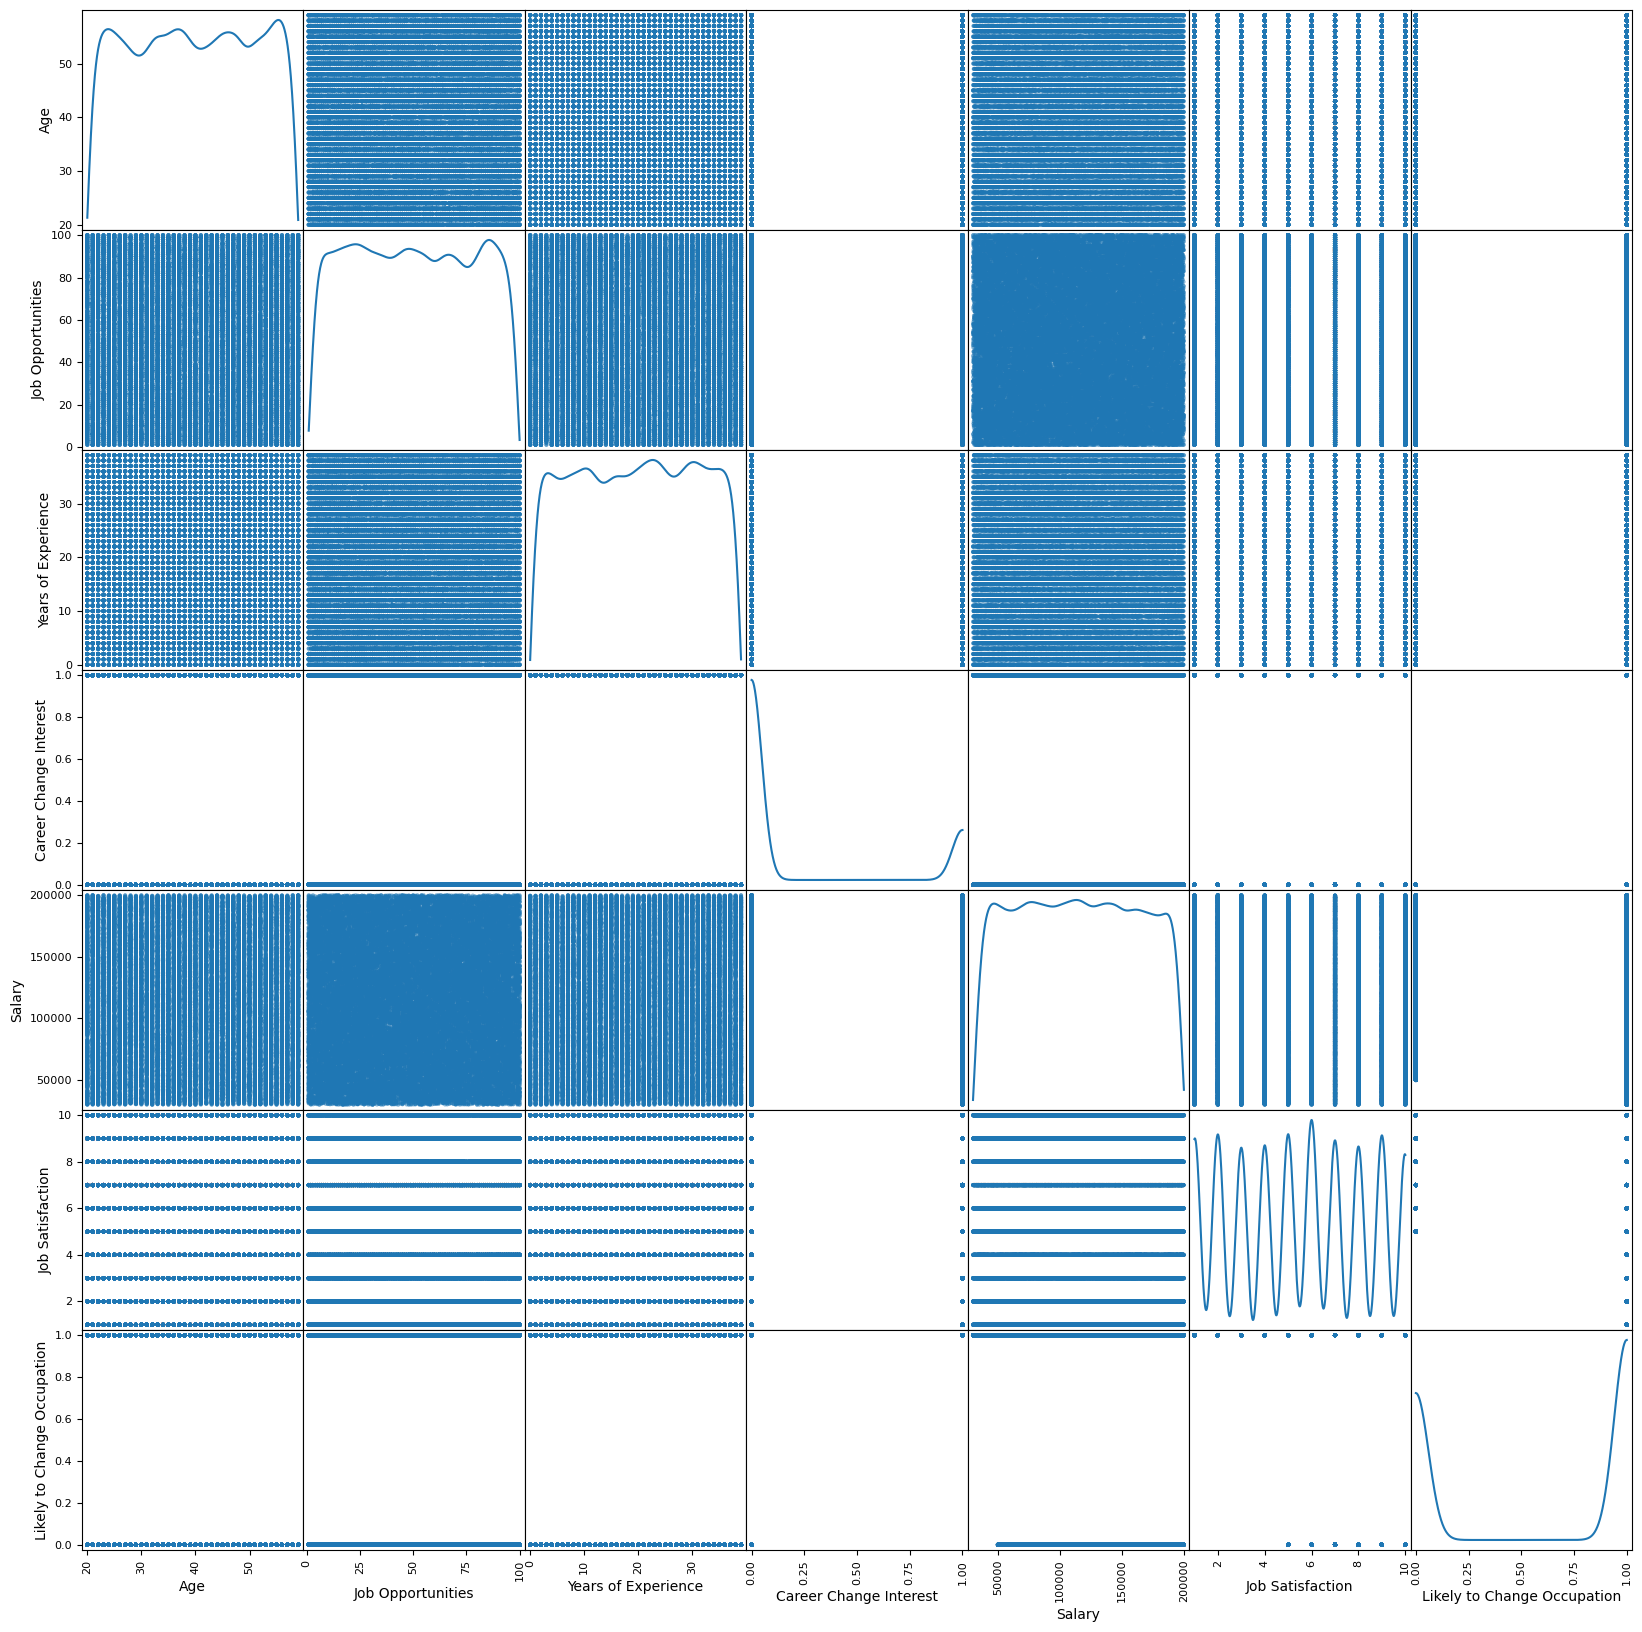

In [12]:
selected_columns = ['Age', 'Job Opportunities','Years of Experience','Career Change Interest','Salary','Job Satisfaction','Likely to Change Occupation']
scatter_matrix(features_reduced_df[selected_columns], alpha=0.5, figsize=(20, 20), diagonal='kde')


plt.show()

In order to solidify the visual representation of relationships between features, I will construct a correlation matrix to give numerical values to the relationships.   
We can see that of the feature relationships, Career Change Interest and Likely to Change Occupation has a moderate positive linear relationship and Job Satisfaction and Likely to Change Occupation have a moderate negative linear relationship. We can see that all the other relations have a correlation coefficent very close to zero, indicating a non-linear relationship.  
I am glad I did both a correlation matrix and a scatter plot matrix as it made the results more clear. 

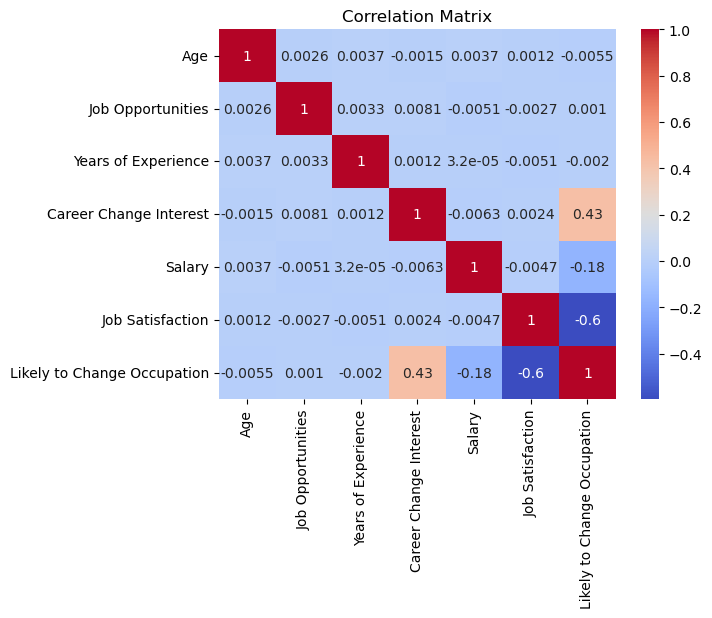

In [13]:
correlation_matrix = df[['Age', 'Job Opportunities','Years of Experience','Career Change Interest','Salary','Job Satisfaction','Likely to Change Occupation']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## Extra: Random Forest

Since most of the relationships are non-linear, it would be interesting to run a Random Forest Algorithm, which works better on non-linear relationships and compare it to the results of the Lasso Regression which predominatly is better for linear relationships.  

The information above and following code are adapted from [Geeks for Geeks: Random Forest Algorithm in Machine Learning](https://www.geeksforgeeks.org/random-forest-algorithm-in-machine-learning/)

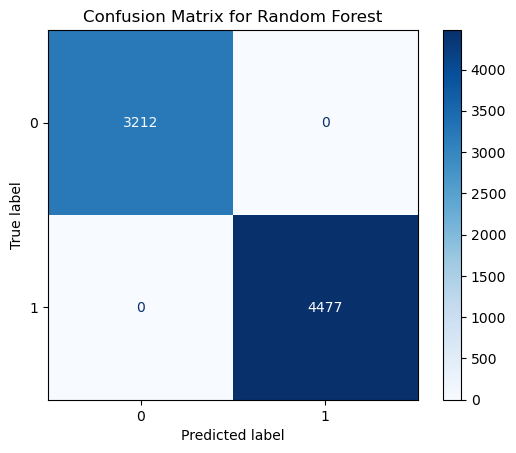

In [14]:
# Extract feature names (excluding the target variable)
features_reduced = features_reduced_df.columns.drop('Likely to Change Occupation').tolist()

# Subset the dataset using the reduced feature list
X_train_reduced = X_train[features_reduced]
X_test_reduced = X_test[features_reduced]

# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_reduced, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test_reduced)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap="Blues")
plt.title('Confusion Matrix for Random Forest')
plt.show()



To confirm the results of the Confusion Matrix and visualize them in a different way, I will calculate the Cross-Validation accuracy and see if the results are the same.

In [15]:
k=5
scores = cross_val_score(rf, X_train[features_reduced], y_train, cv=k, scoring='accuracy')
print(f"Cross-Validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

Cross-Validation Accuracy: 0.9999 ± 0.0001


The results of the Confusion Matrix and Cross-Validation Accuracy for the Random Forest implies that the model is working perfectly on the dataset since there is no Type I or Type II error.  
Below is the code inspired by Stack Overflow ([this page](https://stackoverflow.com/questions/44511636/plot-feature-importance-with-feature-names) and [this one too)](https://stackoverflow.com/questions/73667608/python-pandas-dataframe-comparison) to compare Lasso coefficents and Random Forest feature importance. 

<Figure size 1000x600 with 0 Axes>

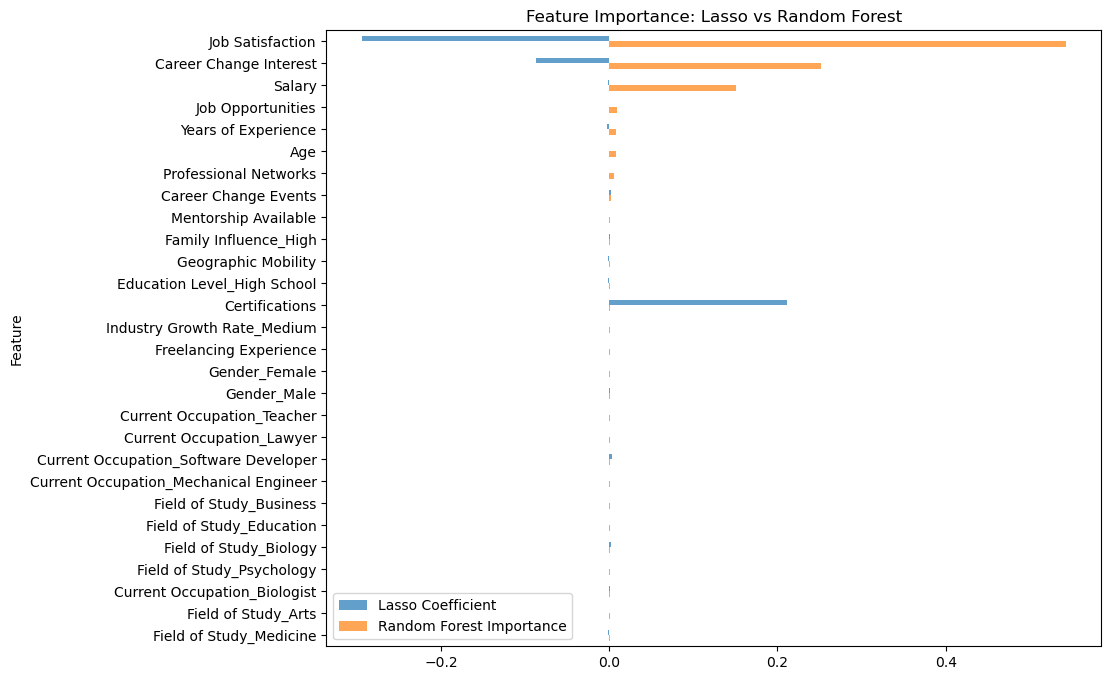

In [16]:
# Compare Lasso coefficients and Random Forest feature importances
rf_importances = rf.feature_importances_
lasso_coefficients = lasso.coef_[:len(features_reduced)]  # Ensure coefficients match feature set

# Create a comparison df
comparison_df = pd.DataFrame({'Feature': features_reduced,'Lasso Coefficient': lasso_coefficients,'Random Forest Importance': rf_importances}).sort_values(by='Random Forest Importance', ascending=False)

# Plot the comparison
plt.figure(figsize=(10, 6))
comparison_df.plot(x='Feature', kind='barh', stacked=False,figsize=(10, 8),title='Feature Importance: Lasso vs Random Forest', alpha=0.7)
plt.gca().invert_yaxis()  # Reverse the order for better readability
plt.show()

This graph shows that Random Forest identifies significance in more features then Lasso Regression, since there are more orange bars than blue. Also, for shared features of Random Forest and Lasso, the Random Forest importance is greater than the Lasso's in most cases. 
This shows that Random Forest is more sensitive, and thus has a potential for overfitting, while Lasso is more selective so it has the potential for underfitting. 
By the Bias-Variance Tradeoff, that makes Lasso have high bias and low variance and Random Forest have low bias and high variance for this dataset. 


## Conclusion: 

Through my project, I found that the three most significant factors (in order from greatest to least) are: Job Satisfaction, Career Change Interest, and Salary. The median salary is higher for those not likely to change jobs. Additionallly, the median Job Satisfaction is lower for those likely to change jobs. 
 It was also interesting to see the how Field of Study and Occupation effect the likeliness to change jobs. Those who study Education are more likely to change occupations, while those who study psychology are the least likely. Also, Biologists are the most likely to change occupations, while teachers are the least likely to change occupations. These results are heavily influenced by salary and job satisfaction. The majority of features forming non-linear relationships was predictable, but made for a very interesting analysis when I compared the results of the Lasso Regression to the Random Forest. Ultimatly, the Random Forest was better as it was more sensitive to the data. 